<a href="https://colab.research.google.com/github/Ravi110296/Chat-bot-with-primary-emotions/blob/main/Chat_bot_with_primary_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chat bot with primary emotions
- This chatbot provides an array of exciting traits :
1. You can provide any name for the chatbot and user
2. You can also select the profile picture of the bot just by providing the prompt
3. The most important feature of this chatbot is that it can capture the primary human emotions like happiness, sadness etc. also it's facial features and moods changes as per the response you provide

Note: Always run this code using a GPU otherwise it might take eternity to get a response

## Installing the Necessary Libraries

In [ ]:
!pip install -q diffusers accelerate transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 44.4 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline,AutoTokenizer,AutoModelForSeq2SeqLM
from diffusers import StableDiffusionPipeline,AutoencoderKL, EulerDiscreteScheduler

In [ ]:
import torch
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

## Building the required gen AI models

In [ ]:
# Transformers - Text2Text
Text2Text_model_name = 'facebook/blenderbot-400M-distill'
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
Text_generator = pipeline('text2text-generation',model = model,tokenizer = tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/730M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/62.9k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/16.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/310k [00:00<?, ?B/s]

In [ ]:
# Stable Diffusion text to image
model_id = 'stabilityai/stable-diffusion-2-1-base'
scheduler = EulerDiscreteScheduler.from_pretrained(model_id,subfolder='scheduler')
text_2_image_model = StableDiffusionPipeline.from_pretrained(model_id,scheduler = scheduler,guidance_scale = 11,torch_dtype = torch.float16,variant = 'fp16')
text_2_image_model = text_2_image_model.to('cuda')

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'guidance_scale': 11} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Sentiment Analysis
sentiment_model_name = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
sentiment_model = pipeline('sentiment-analysis',model = sentiment_model_name)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
#Zero_shot classification of the sentiment of the prompt
zero_model_name = 'MoritzLaurer/bge-m3-zeroshot-v2.0'
zero_shot_model = pipeline('zero-shot-classification')

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Creating the functions to ease our work

In [ ]:
def text_model(inp : str,bot_name : str):
  output = Text_generator(inp)[0]['generated_text']
  return print(f'{bot_name} : {output}')

In [ ]:
def text_input(username,bot_name):
  inp = input(f'{username} : ')
  text_model(inp,bot_name)
  return inp

In [ ]:
def image_generation(prompt):
  image = text_2_image_model(prompt,num_inference_steps=50,generator=torch.Generator().manual_seed(42)).images[0]
  image.save('my_image.jpg')
  return image

In [ ]:
def zero_shot(prompt,label,score):
  positive = ['Happy','smiling','laughing']
  neutral = ['thinking','neutral']
  negative = ['sad','crying','angry']
  if label == 'positive' and score > 0.50:
    res = pd.DataFrame(zero_shot_model(prompt,positive,multi_label = False))
    tag = res[res['scores'] == max(res['scores'])].labels[0]
  elif label == 'neutral' and score > 0.60:
    res = pd.DataFrame(zero_shot_model(prompt,neutral,multi_label = False))
    tag = res[res['scores'] == max(res['scores'])].labels[0]
  elif label == 'negative' and score > 0.50:
    res = pd.DataFrame(zero_shot_model(prompt,negative,multi_label = False))
    tag = res[res['scores'] == max(res['scores'])].labels[0]
  else:
    tag = 'smirk'
  return tag

In [ ]:
def sentiment(prompt):
  res = sentiment_model(prompt)[0]
  label = res['label']
  score = res['score']
  tag = zero_shot(prompt,label,score)
  return tag

In [ ]:
def sentiment_img_gen(prompt,tag):
  new_prompt = prompt+' '+tag
  image = text_2_image_model(new_prompt,num_inference_steps=50,generator=torch.Generator().manual_seed(42)).images[0]
  image.save('my_image.jpg')
  return image

## Main Model

Enter the details how would you like your partner to look like : Scarlett Johansson
Enter the name you would like model to call you : Apollo
Enter the name of your partner : Scarlett


  0%|          | 0/50 [00:00<?, ?it/s]

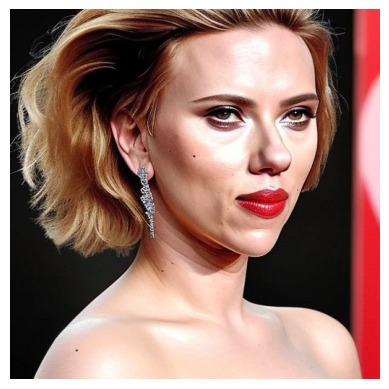

Apollo : I have a good news for you
Scarlett :  Thank you! I am so excited. I have been waiting for this for a long time.


  0%|          | 0/50 [00:00<?, ?it/s]

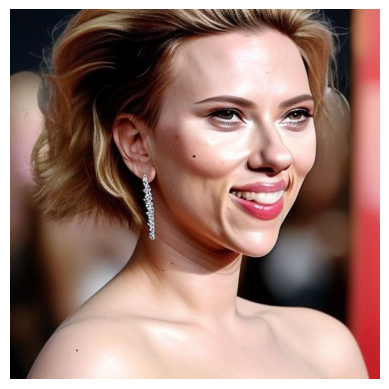

Apollo : The good news is you are coming to Switzerland with me
Scarlett :  I would love to go there! I have always wanted to see the Northern Lights.


  0%|          | 0/50 [00:00<?, ?it/s]

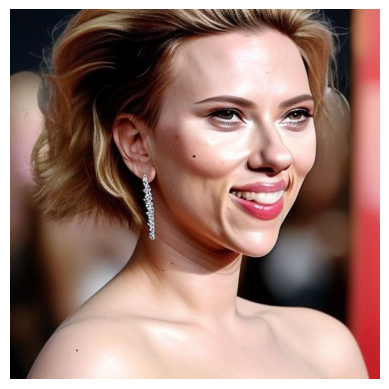

Apollo : How dare you
Scarlett :  I don't know what to do. I feel like I'm going to lose my job.


  0%|          | 0/50 [00:00<?, ?it/s]

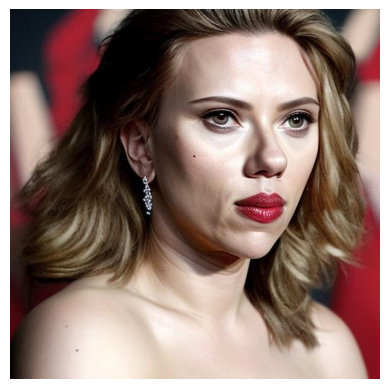

In [ ]:
try:
  image_gen_prompt = input('Enter the details how would you like your partner to look like : ')
  user = input('Enter the name you would like model to call you : ')
  bot = input('Enter the name of your partner : ')
  image_generation(image_gen_prompt)
  image = Image.open('my_image.jpg')
  plt.imshow(image)
  plt.axis('off')
  plt.show()
  while True:
    prom = text_input(username = user,bot_name = bot)
    tag = sentiment(prom)
    sentiment_img_gen(image_gen_prompt,tag)
    image = Image.open('my_image.jpg')
    plt.imshow(image)
    plt.axis('off')
    plt.show()
except KeyboardInterrupt:
  pass